# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.122979e+01     8.041349e+00
 * time: 0.0014331340789794922
     1     2.962691e+01     5.194341e+00
 * time: 0.00603795051574707
     2     2.182118e+01     6.600144e+00
 * time: 0.012025117874145508
     3     1.563171e+01     4.917492e+00
 * time: 0.01752305030822754
     4     1.186117e+01     2.149640e+00
 * time: 0.022284984588623047
     5     1.137053e+01     2.929259e+00
 * time: 0.026194095611572266
     6     1.053403e+01     1.750955e+00
 * time: 0.031018972396850586
     7     9.747891e+00     1.552575e+00
 * time: 0.034928083419799805
     8     9.090514e+00     1.679429e+00
 * time: 0.038886070251464844
     9     8.779532e+00     1.127845e+00
 * time: 0.04311013221740723
    10     8.582690e+00     9.808984e-01
 * time: 0.0481419563293457
    11     8.381509e+00     8.715960e-01
 * time: 0.052304983139038086
    12     8.223375e+00     6.743384e-01
 * time: 0.05624508857727051
    13     8.197315e+00     8.439144e-01


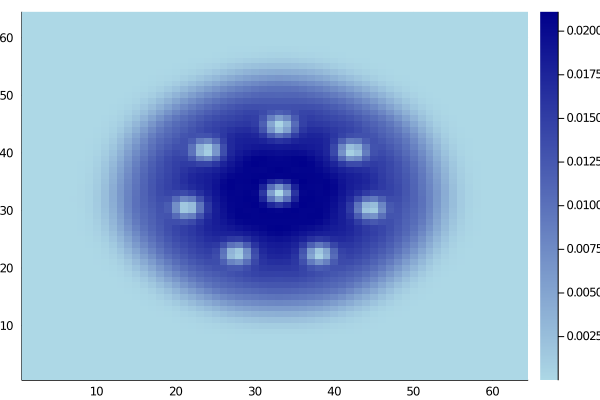

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)